# An Overview of SymPy

# Importing Sympy

>```python
from sympy import *
```

In [2]:
from sympy import *

# Symbols

Symbols can be created in a few different ways in SymPy, for example, <br>
`sympy.Symbol`, `sympy.symbols`, and `sympy.var`

In [3]:
x = Symbol('x')
x

x

The variable $x$ now represents an abstract mathematical symbol which could, for example, represent a real number, an integer, a complex number, a function, as well as a large number of other possibilities.<br>
If we have a mathematical variable $y$ that is known to be a real number, we can use the `real=True` keyword argument when creating the corresponding symbol instance. We can verify that SymPy indeed recognizes that the symbol is real by using
the `is_real` attribute of the Symbol class:

In [4]:
y = Symbol('y', real=True)
y.is_real

True

If, on the other hand we were to use `is_real` to query the previously defined symbol $x$, which was not explicitly specified to real, and therefore can represent both real and nonreal variables, we get None as result:

In [136]:
x.is_real is None

False

`is_real` returns **True** if the symbol is known to be **real**, **False** if the symbol is known to be **not real**, and **None** if it is not known if the symbol is real or not

In [5]:
Symbol('z', imaginary=True).is_real

False

Explicitly specifying when creating new symbols as real and positive or anything else as required, can help SymPy to simplify various expressions further than otherwise possible.

In [6]:
x = Symbol('x')
y = Symbol('y', positive=True)

In [7]:
sqrt(x**2)

sqrt(x**2)

In [8]:
sqrt(y**2)

y

When working with mathematical symbols that represent integers, rather than real numbers, it is also useful to explicitly specify this when creating the corresponding SymPy symbols, using, for example, the integer=True, or even=True or odd=True, if applicable. This may also allow SymPy to analytically simplify certain expressions and function evaluations.

In [9]:
n1 = Symbol('n')
n2 = Symbol('n', integer=True)
n3 = Symbol('n', odd=True)

In [10]:
cos(n1*pi)

cos(pi*n)

In [11]:
cos(n2*pi)

(-1)**n

In [12]:
cos(n3*pi)

-1

Using Python’s tuple unpacking syntax together with a call to `sympy.symbols` is a convenient way to create multiple symbols:

In [ ]:
a, b, c = symbols('a, b, c', negative=True)
d, e, f = symbols('d, e, f', positive=True)

# Constants and Special Symbols

Selected mathematical constants and special symbols and their corresponding symbols in SymPy:

|Mathematical Symbol|SymPy Symbol|Description
|:---|:---|:---
|$\pi$|`pi`|Ratio of the circumference to the diameter of a circle.
|$e$|`E`|The base of the natural logarithm $e = exp (1)$.
|$\gamma$|`EulerGamma`|Euler's constant
|$i$|`I`|The imaginary unit.
|$\infty$|`oo`|Infinity

# Functions

## Undefined Functions

In [13]:
x, y, z = symbols('x, y, z')
f = Function('f')
type(f)

sympy.core.function.UndefinedFunction

In [14]:
f(x)

f(x)

In [15]:
g = Function('g')(x, y, z)
g

g(x, y, z)

In [16]:
g.free_symbols

{x, y, z}

## Defined Functions

In [17]:
type(sin)

sympy.core.function.FunctionClass

In [18]:
sin(1.5*pi)

-1

In [19]:
n = Symbol('n')
sin(n*pi)

sin(pi*n)

In [20]:
n = Symbol('n', integer=True)
sin(n*pi)

0

## Lambda Functions

It can be created `sympy.Lambda`

In [21]:
f = Lambda(x, x**2)
f

Lambda(x, x**2)

In [22]:
f(1.5)

2.25000000000000

In [23]:
f(1 + x)

(x + 1)**2

# Expressions

In SymPy, mathematical expressions are represented as trees where leafs are symbols, and nodes are class instances that represent mathematical operations.<br>
Examples of these classes are `Add`, `Mul`, and `Pow` for basic arithmetic operators, and `Sum`, `Product`, `Integral`, and `Derivative` for analytical mathematical operations.

In [24]:
x = symbols('x')
expr = 1 + x + x**2 + x**3
expr

x**3 + x**2 + x + 1

In [25]:
expr.args

(1, x, x**2, x**3)

In [26]:
expr.args[0]

1

In [27]:
expr.args[1]

x

In [28]:
expr.args[2]

x**2

In [29]:
expr.args[3]

x**3

# Manipulating Expressions

## Simplification

In [30]:
expr = 2 * (x**2 - x) - x * (x + 1)
expr

2*x**2 - x*(x + 1) - 2*x

In [31]:
simplify(expr)

x*(x - 3)

In [32]:
expr.simplify()

x*(x - 3)

In [33]:
expr

2*x**2 - x*(x + 1) - 2*x

In [34]:
expr = 2 * cos(x) * sin(x)
expr

2*sin(x)*cos(x)

In [35]:
expr.simplify()

sin(2*x)

In [36]:
expr = exp(x)*exp(y)
expr

exp(x)*exp(y)

In [37]:
simplify(expr)

exp(x + y)

Each specific type of simplification can also be carried out with more specialized functions, such as `sympy.trigsimp` and `sympy.powsimp`, for trigonometric and power simplifications, respectively.<br>
Summary of selected SymPy functions for simplifying expressions:

|Function|Description
|:---|:---
|`sympy.simplify`| Attempt various methods and approaches to obtain a simpler form of a given expression.
|`sympy.trigsimp`| Attempt to simplify an expression using trigonometric identities.
|`sympy.powsimp`| Attempt to simplify an expression using laws of powers.
|`sympy.compsimp`| Simplify combinatorial expressions.
|`sympy.ratsimp`| Simplify an expression by writing on a common denominator

## Expand

In [38]:
expr = (x + 1) * (x + 2)
expr

(x + 1)*(x + 2)

In [39]:
expand(expr)

x**2 + 3*x + 2

In [40]:
sin(x + y).expand(trig=True)

sin(x)*cos(y) + sin(y)*cos(x)

In [41]:
log(x * y).expand(log=True)

log(x*y)

In [42]:
a, b = symbols('a, b', positive=True)
log(a*b).expand(log=True)

log(a) + log(b)

In [43]:
expr = exp(a + I*b)
expr

exp(a + I*b)

In [44]:
expr.expand(complex=True)

I*exp(a)*sin(b) + exp(a)*cos(b)

## Factor, Collect and Combine

In [45]:
expr = x**2 - 1
factor(expr)

(x - 1)*(x + 1)

In [46]:
expr = x*cos(y) + x*sin(z)
factor(expr)

x*(sin(z) + cos(y))

In [47]:
expr = log(a) - log(b)
logcombine(expr)

log(a/b)

In [48]:
expr = x + y + x*z + x*y
expr.collect(x)

x*(y + z + 1) + y

In [49]:
expr.collect(y)

x*z + x + y*(x + 1)

## Apart, Together and Cancel

In [50]:
apart(1/(x**2 + 3*x + 2), x)

-1/(x + 2) + 1/(x + 1)

In [51]:
together(1 / (y * x + y) + 1 / (1+x))

(y + 1)/(y*(x + 1))

In [52]:
cancel(y / (y * x + y))

1/(x + 1)

## Substitutions

In [53]:
(x + y).subs(x, y)

2*y

In [54]:
expr = sin(x*exp(x))
expr

sin(x*exp(x))

In [55]:
expr.subs(x, y)

sin(y*exp(y))

For muliple substitutions, we can pass a dictionary as first and only argument to `subs`, which maps old symbols or expressions to new symbols or expressions:

In [56]:
expr = sin(x * z)
expr

sin(x*z)

In [57]:
expr.subs({sin:cos, x:y, z:exp(x)})

cos(y*exp(x))

In [58]:
expr = x*y + z**2* x

To substitute numerical values in place of symbolic number,
for numerical evaluation, a convenient way of doing this is to
define a dictionary that translates the symbols to numerical values, and passing this dictionary as argument
to the subs method.

In [59]:
expr

x*y + x*z**2

In [60]:
values = {x:1.25,
         y:0.04,
         z:3.2}

In [61]:
expr.subs(values)

12.8500000000000

# Numerical Evaluation

Even when working with symbolic mathematics, it is almost invariably sooner or later required to evaluate
the symbolic expressions numerically, for example, when producing plots or concrete numerical results.
A SymPy expression can be evaluated using either the `sympy.N` function, or the `evalf` method of SymPy
expression instances.<br>
Both `sympy.N` and the `evalf` method take an optional argument that specifies the number of significant
digits to which the expression is to be evaluated.

In [62]:
N(1 + pi)

4.14159265358979

In [63]:
N(pi, 10)

3.141592654

In [64]:
(x + 1/pi).evalf()

x + 0.318309886183791

In [65]:
(x + 1/pi).evalf(5)

x + 0.31831

`sympy.lambdify` function takes a set of free symbols and an expression as arguments, and generates a function that efficiently evaluates the numerical value of the expression.
The produced function takes the same number of arguments as the number of free symbols passed as first argument to `sympy.lambdify`.

In [66]:
x  = symbols('x')
expr = sin(pi*x*exp(x))
expr

sin(pi*x*exp(x))

In [67]:
expr_num = lambdify(x, expr)
expr_num(10)

0.879393997597802

By passing the optional argument 'numpy' as third argument to `sympy.lambdify` SymPy creates a vectorized function that accepts NumPy arrays as input.

In [68]:
expr_num = lambdify(x, expr, 'numpy')
import numpy as np
xvalues = np.arange(1, 10)
expr_num(xvalues)

array([ 0.77394269,  0.64198244,  0.72163867,  0.94361635,  0.20523391,
        0.97398794,  0.97734066, -0.87034418, -0.69512687])

# Calculas

## Derivatives

In SymPy we can calculate the derivative of a function using `sympy.diff`

In [69]:
x = Symbol('x')
f = Function('f')(x)
diff(f, x)

Derivative(f(x), x)

In [70]:
diff(f, x, x)

Derivative(f(x), (x, 2))

In [71]:
diff(f, x, 3)

Derivative(f(x), (x, 3))

For multivariate functions -

In [72]:
x, y, z = symbols('x, y, z')
g = Function('g')(x, y)
g.diff(x, y)

Derivative(g(x, y), x, y)

In [73]:
g.diff(x, 3, y, 2)

Derivative(g(x, y), (x, 3), (y, 2))

For defined functions -

In [74]:
expr = x**4 + x**3 + x**2 + x + 1
expr.diff(x)

4*x**3 + 3*x**2 + 2*x + 1

In [75]:
expr.diff(x, x)

2*(6*x**2 + 3*x + 1)

In [76]:
expr = (x + 1)**3 * y**2 *(z - 1)
expr.diff(x, y, z)

6*y*(x + 1)**2

For trigonometric functions -

In [77]:
expr = sin(x * y) * cos(x / 2)
expr.diff(x)

y*cos(x/2)*cos(x*y) - sin(x/2)*sin(x*y)/2

Alternative way (delayed evaluation) -

In [78]:
expr = exp(cos(x))
d = Derivative(expr, x)
d

Derivative(exp(cos(x)), x)

In [79]:
d.doit()

-exp(cos(x))*sin(x)

## Integrals

In [80]:
a, b, x, y = symbols('a, b, x, y')
f = Function('f')(x)
integrate(f)

Integral(f(x), x)

In [81]:
integrate(f, (x, a, b))

Integral(f(x), (x, a, b))

In [82]:
integrate(sin(x))

-cos(x)

In [83]:
integrate(sin(x), (x, a, b))

cos(a) - cos(b)

In [84]:
integrate(exp(-x**2), (x, 0, oo))

sqrt(pi)/2

SymPy will not be able to give symbolic results for any integral. When SymPy fails to evaluate an integral, an
instance of `sympy.Integral`, representing the formal integral, is returned instead.

In [85]:
integrate(sin(x*cos(x)), x)

Integral(sin(x*cos(x)), x)

Multibariable expressions -

In [86]:
integrate(sin(x*exp(y)), x)

-exp(-y)*cos(x*exp(y))

In [87]:
expr = (x + y)**2
integrate(expr, x)

x**3/3 + x**2*y + x*y**2

By passing more than one symbol, or more than one tuple that contain symbols and their integration limits, we can carry out multiple integration:

In [88]:
expr = (x + y)**2
integrate(expr, (x, 0, 1), (y, 0, 1))

7/6

## Series

In [89]:
x = Symbol('x')
f = Function('f')(x)
series(f, x)

f(0) + x*Subs(Derivative(f(_x), _x), _x, 0) + x**2*Subs(Derivative(f(_x), (_x, 2)), _x, 0)/2 + x**3*Subs(Derivative(f(_x), (_x, 3)), _x, 0)/6 + x**4*Subs(Derivative(f(_x), (_x, 4)), _x, 0)/24 + x**5*Subs(Derivative(f(_x), (_x, 5)), _x, 0)/120 + O(x**6)

To change the point around which the function is expanded, we specify $x_0$ argument -

In [90]:
x0 = Symbol('{x_0}')
f.series(x, x0, n=2)

f({x_0}) + (x - {x_0})*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, {x_0}) + O((x - {x_0})**2, (x, {x_0}))

In [91]:
f.series(x, x0, n=2).removeO()

(x - {x_0})*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, {x_0}) + f({x_0})

For specified functions -

In [92]:
sin(x).series()

x - x**3/6 + x**5/120 + O(x**6)

In [93]:
cos(x).series()

1 - x**2/2 + x**4/24 + O(x**6)

In [94]:
exp(x).series()

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

In [95]:
(1/(1 + x)).series()

1 - x + x**2 - x**3 + x**4 - x**5 + O(x**6)

For arbitrary expressions of symbols and functions, which in general can also be evaluated.

In [96]:
expr = cos(x)/(1 + sin(x*y))
expr.series(x, n=4)

1 - x*y + x**2*(y**2 - 1/2) + x**3*(-5*y**3/6 + y/2) + O(x**4)

In [97]:
expr.series(y, n=4)

cos(x) - x*y*cos(x) + x**2*y**2*cos(x) - 5*x**3*y**3*cos(x)/6 + O(y**4)

## Limits

In SymPy, limits can be evaluated using the `sympy.limit` function, which takes an expression, a symbol it depends on, as well as the value that the symbol approaches in the limit. 

In [98]:
limit(sin(x)/x, x, 0)

1

In [99]:
f = Function('f')
x, h = symbols('x, h')
diff_limit = (f(x + h) - f(x))/h
limit(diff_limit.subs(f, cos), h, 0)

-sin(x)

In [100]:
limit(diff_limit.subs(f, sin), h, 0)

cos(x)

## Sums and Products

In [101]:
n = symbols('n', integer=True)
x = Sum(1/n**2, (n, 1, oo))
x

Sum(n**(-2), (n, 1, oo))

In [102]:
x.doit()

pi**2/6

In [103]:
x = Product(n, (n, 1, 7))
x

Product(n, (n, 1, 7))

In [104]:
x.doit()

5040

# Equations

In [105]:
x = Symbol('x')
solve(x**2 + 2*x -3)

[-3, 1]

In [106]:
a, b, c, x = symbols('a, b, c, x')
solve(a*x**2 + b*x + c, x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

Trigonometric Functions -

In [107]:
solve(sin(x) - cos(x), x)

[-3*pi/4, pi/4]

Solving a system of equations for more than one unknown variable in SymPy is a straightforward generalization of the procedure used for univariate equations. Instead of passing a single expression as first argument to `sympy.solve`, a list of expressions that represent the system of equations is used, and in this case the second argument should be a list of symbols to solve for. 

In [108]:
eq1 = x + 2*y -1
eq2 = x - y + 1

solve([eq1, eq2], [x, y], dict=True)

[{x: -1/3, y: 2/3}]

In [109]:
eq1 = x**2 - y
eq2 = y**2 - x

sols = solve([eq1, eq2], [x, y], dict=True)
sols

[{x: 0, y: 0},
 {x: 1, y: 1},
 {x: (-1/2 - sqrt(3)*I/2)**2, y: -1/2 - sqrt(3)*I/2},
 {x: (-1/2 + sqrt(3)*I/2)**2, y: -1/2 + sqrt(3)*I/2}]

Verification -

In [110]:
[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 for sol in sols]

[True, True, True, True]

# Linear Algebra

In [111]:
Matrix([1, 2])

Matrix([
[1],
[2]])

In [112]:
Matrix([ [1, 2 ] ])

Matrix([[1, 2]])

In [113]:
Matrix( [[1, 2], [3, 4] ])

Matrix([
[1, 2],
[3, 4]])

In [114]:
Matrix(3, 4, lambda m, n: 10*m + n)

Matrix([
[ 0,  1,  2,  3],
[10, 11, 12, 13],
[20, 21, 22, 23]])

In [115]:
a, b, c, d = symbols('a, b, c, d')
M = Matrix([[a, b], [c, d] ] )
M

Matrix([
[a, b],
[c, d]])

In [116]:
M * M

Matrix([
[a**2 + b*c,  a*b + b*d],
[ a*c + c*d, b*c + d**2]])

In [117]:
x = Matrix(symbols("x_1, x_2"))
x

Matrix([
[x_1],
[x_2]])

In [118]:
M * x

Matrix([
[a*x_1 + b*x_2],
[c*x_1 + d*x_2]])

# Practical Examples

## 1. Newton's Law of Cooling
### By Analytical Way using SymPy
$$\frac{dT(t)}{dt} = k(T(t) - T_a)$$
at $t=0$, $T(0)=T_0$.

In [ ]:
from sympy import *

In [119]:
T, Ta, T0, k, t = symbols('T, T_a, T_0, k, t')
T  = Function('T')
diff_eq = Eq(T(t).diff(t),-k*(T(t) - Ta))
diff_eq

Eq(Derivative(T(t), t), -k*(-T_a + T(t)))

In [120]:
sol = dsolve(diff_eq)
sol

Eq(T(t), C1*exp(-k*t) + T_a)

In [121]:
ic = Eq(sol.rhs.subs(t, 0), T0)
ic

Eq(C1 + T_a, T_0)

In [122]:
const = solve(ic)
const

[{C1: T_0 - T_a}]

In [123]:
final_sol = sol.subs(const[0])
final_sol

Eq(T(t), T_a + (T_0 - T_a)*exp(-k*t))

In [124]:
T =lambdify([Ta, T0, k, t], final_sol.rhs)
T

<function _lambdifygenerated(T_a, T_0, k, t)>

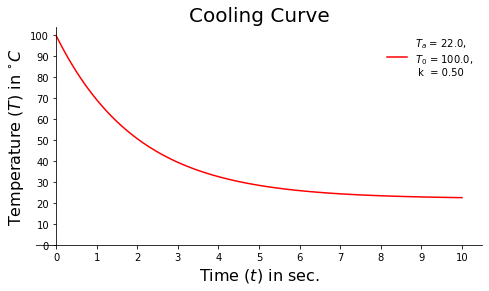

In [126]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.5
Ta = 22
T0 = 100
t = np.linspace(0, 10, 100)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, T(Ta, T0, k, t), color='red', label="""$T_a$ = %0.1f,
$T_0$ = %0.1f,
 k  = %0.2f"""%(Ta, T0, k))
ax.set_xlabel('Time ($t$) in sec.', fontsize=16)
ax.set_ylabel('Temperature ($T$) in $^{\circ}C$', fontsize=16)
ax.set_title('Cooling Curve', fontsize=20)

# removing top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.set_xticks(range(0, 11, 1))
ax.set_yticks(range(0, 110, 10))

ax.legend(frameon=False)
ax.grid(False)




## 2. Damped harmonic Oscillator
$$\frac{d^2 x(t)}{dt^2} + 2\gamma \omega_0 \frac{d x(t)}{dt} + \omega_0^2 x(t) = 0$$
where $x(t)$ is the position of the oscillator at time $t$, $\omega_0$ is the frequency of the oscillator in the undamped case and $\gamma$ is the damping ratio.

In [127]:
t, omega0, gamma = symbols('t, omega_0, gamma', positive=True)
x                = Function('x')

ode = x(t).diff(t, 2) + 2*gamma*omega0*x(t).diff(t) + omega0**2 *x(t)
ode

2*gamma*omega_0*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2))

In [128]:
Eq(ode)

Eq(2*gamma*omega_0*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [129]:
ode_sol = dsolve(Eq(ode))
ode_sol

Eq(x(t), C1*exp(omega_0*t*(-gamma - sqrt(gamma - 1)*sqrt(gamma + 1))) + C2*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

#### Initial conditions:

> 1.  at time $t=0$, displacement of the oscillator, $x(t) = 1$
1.   at time $t=0$, velocity of the oscillator, $\frac{d x(t)}{dt} = 0$

In [130]:
ic1 = x(t).subs(t, 0)
ic2 = x(t).diff(t).subs(t, 0)
ics = {ic1:1, ic2:0}
ics

{x(0): 1, Subs(Derivative(x(t), t), t, 0): 0}

In [133]:
eq1 = Eq(ode_sol.rhs.subs(t, 0), 1)
eq2 = Eq(ode_sol.rhs.diff(t).subs(t, 0), 0)
constants = solve([eq1, eq2])
x_t_sol = ode_sol.subs(constants[0])
x_t_sol


Eq(x(t), (-gamma/(2*sqrt(gamma**2 - 1)) + 1/2)*exp(omega_0*t*(-gamma - sqrt(gamma - 1)*sqrt(gamma + 1))) + (gamma/(2*sqrt(gamma**2 - 1)) + 1/2)*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

In [134]:
x_t_critical = limit(x_t_sol.rhs, gamma, 1)
x_t_critical

(omega_0*t + 1)*exp(-omega_0*t)

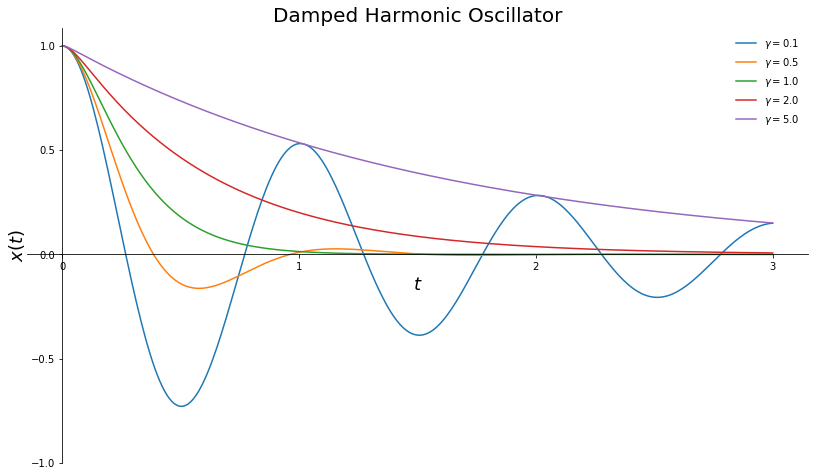

In [135]:
fig, ax = plt.subplots(figsize=(14, 8))
tt = np.linspace(0, 3, 300)
w0 = 2* np.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = lambdify(t, x_t_critical.subs({omega0:w0, gamma:g}), 'numpy')
    else:
        x_t = lambdify(t, x_t_sol.rhs.subs({omega0:w0, gamma:g}), 'numpy')
    ax.plot(tt, x_t(tt).real,  label="$\gamma = %.1f$" % g )
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.set_title('Damped Harmonic Oscillator', fontsize=20)

# removing top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.set_xticks(np.arange(0, 4, 1))
ax.set_yticks(np.arange(-1, 1.5, 0.5))

ax.legend(frameon=False)
ax.grid(False)
plt.legend(frameon=False, loc='upper right')
plt.grid(False)